<a href="https://colab.research.google.com/github/belhajjamorsamar/Bookshop/blob/main/energy_demand_forcasting_withDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_row',11)
# pour lire le fichier csv depuis le drive
data=pd.read_csv("/content/drive/MyDrive/demand energy forcasting /Energy_consumption.csv")
#pour afficher les premiers lignes de code
data.head(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791
7,2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906
8,2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236
9,2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214


In [ ]:
#faire une copie du data
df=data.copy()

In [ ]:
#pour avoir le nombre du clones et nombre des ligne d'un dataframe
df.shape

(1000, 11)

In [ ]:
#la fonction dtypes de pandas : elle permet d'avoir les types de vgaleurs asoocies a chaques variables de notres dataset

In [ ]:
#compter les types de variables
df.dtypes.value_counts()

object     5
float64    5
int64      1
Name: count, dtype: int64

In [ ]:
#analyser des valeur manquantes de notre dataset
#on remarque que il existe pas des valeur true donc dans ce cas la  il existes pas des valeurs null dans notre base de donneés
df.isnull()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["EnergyConsumption"].value_counts()

EnergyConsumption
75.364373    1
71.879720    1
64.552183    1
81.890115    1
90.009188    1
            ..
82.699849    1
72.516165    1
89.104221    1
75.103481    1
71.545311    1
Name: count, Length: 1000, dtype: int64

<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

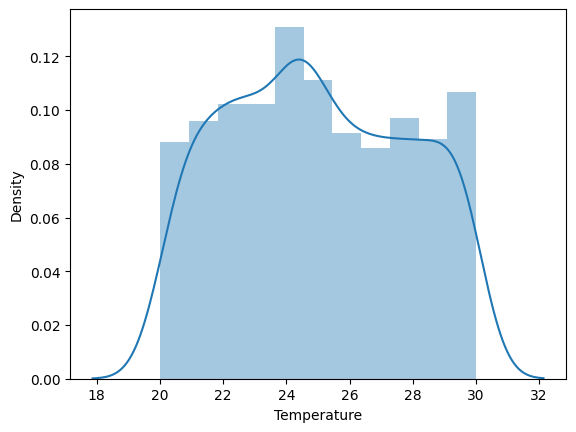

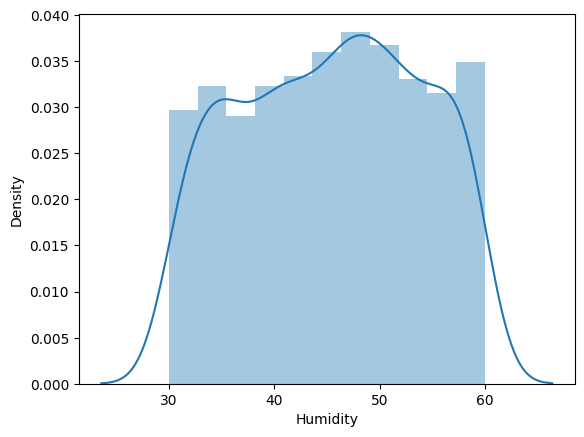

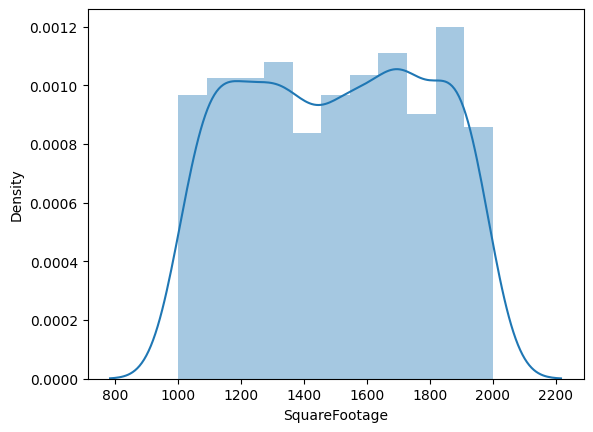

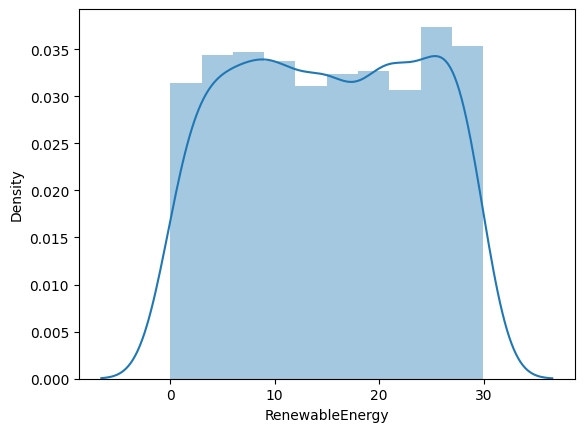

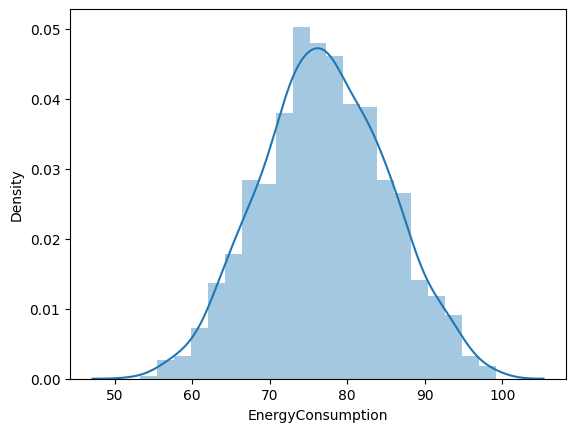

In [ ]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])


In [ ]:
for col2 in df.select_dtypes('int'):
  print(col2)

Occupancy


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


<Axes: xlabel='EnergyConsumption'>

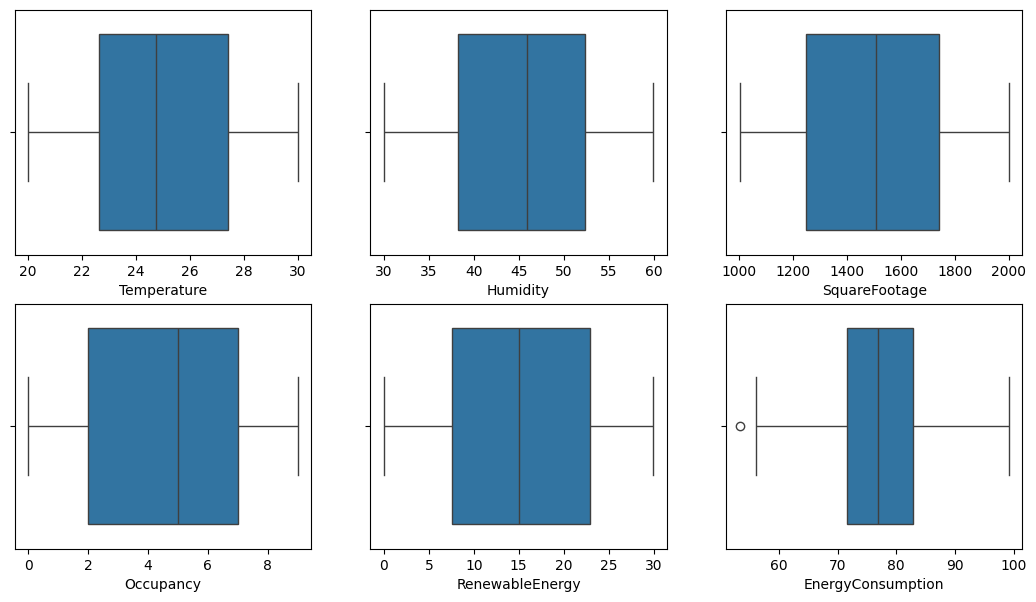

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 7))

sns.boxplot(x=df['Temperature'], ax=axes[0][0])
sns.boxplot(x=df['Humidity'], ax=axes[0][1])
sns.boxplot(x=df['SquareFootage'], ax=axes[0][2])
sns.boxplot(x=df['Occupancy'], ax=axes[1][0])
sns.boxplot(x=df['RenewableEnergy'], ax=axes[1][1])
sns.boxplot(x=df['EnergyConsumption'], ax=axes[1][2])

In [ ]:
data[data['EnergyConsumption'] == data['EnergyConsumption'].max()]


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
391,2022-01-17 07:00:00,29.764203,40.901013,1463.830143,6,On,On,15.321499,Saturday,No,99.20112


In [ ]:
data[data['EnergyConsumption'] == data['EnergyConsumption'].min()]


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
69,2022-01-03 21:00:00,20.735716,48.506636,1836.542651,4,Off,On,9.295439,Friday,No,53.263278


<ipython-input-31-504f6392a067>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["EnergyConsumption"]).set_title("consomation d'energie")


Text(0.5, 1.0, "consomation d'energie")

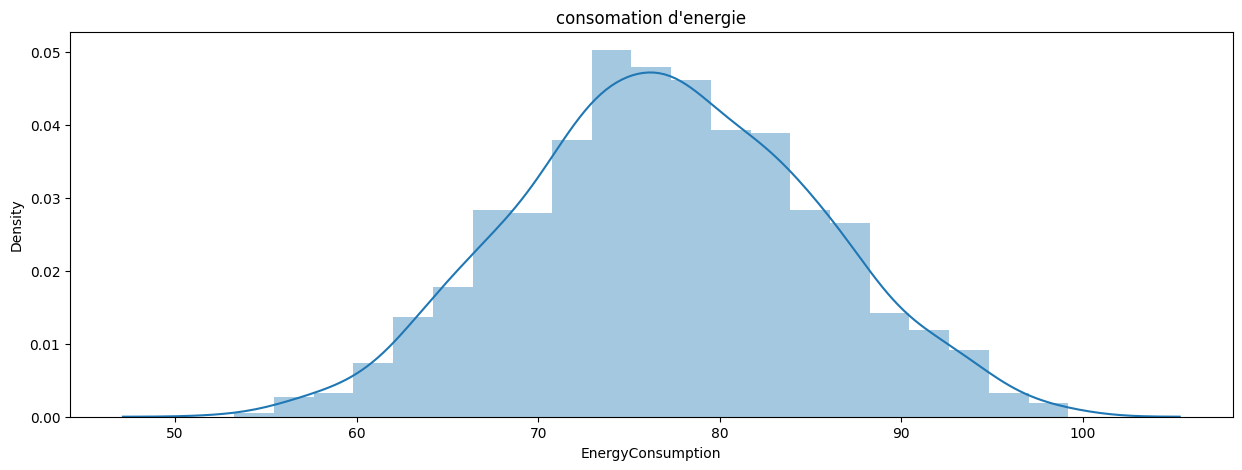

In [ ]:

fig = plt.subplots(figsize=(15, 5))
sns.distplot(data["EnergyConsumption"]).set_title("consomation d'energie")

<ipython-input-32-fa1e7c1f9db5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Temperature"]).set_title("EnergyConsumption")


Text(0.5, 1.0, 'EnergyConsumption')

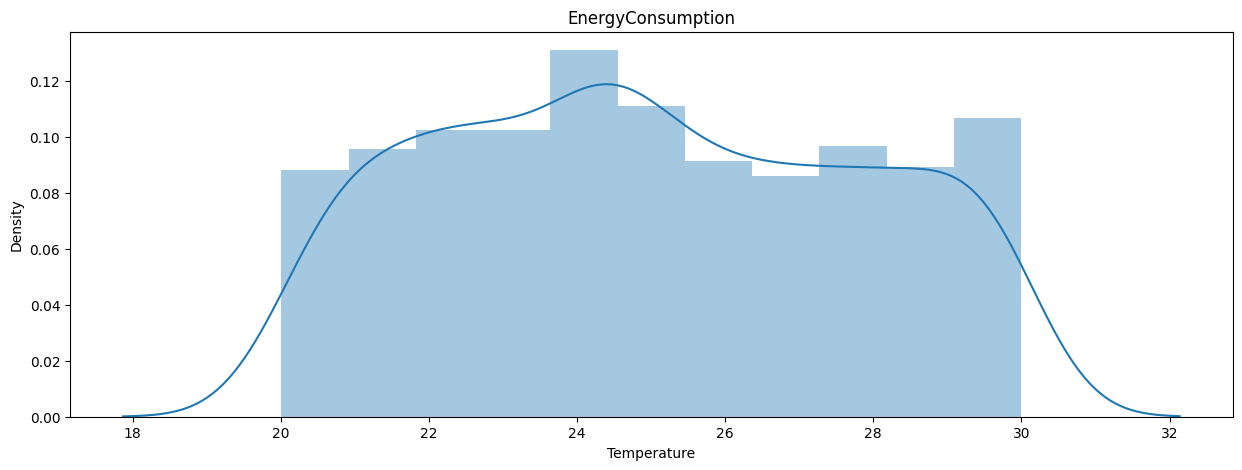

In [ ]:

fig = plt.subplots(figsize=(15, 5))
sns.distplot(data["Temperature"]).set_title("EnergyConsumption")

<ipython-input-33-7a2f6580c91c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Humidity"]).set_title("humidity distrubtion")


Text(0.5, 1.0, 'humidity distrubtion')

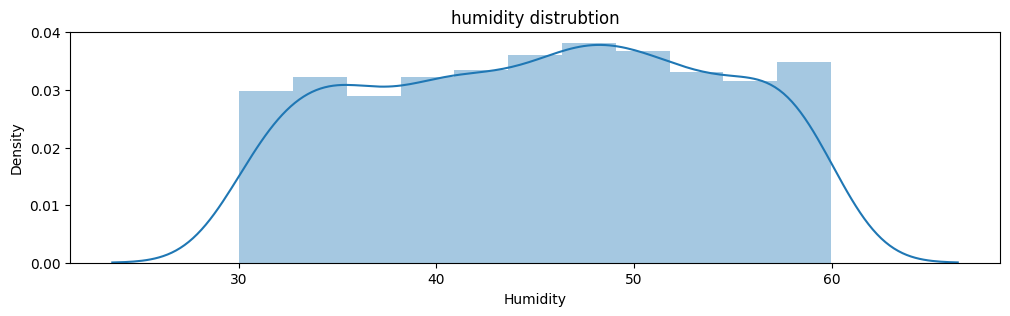

In [ ]:

fig = plt.subplots(figsize=(12, 3))
sns.distplot(data["Humidity"]).set_title("humidity distrubtion")

<ipython-input-34-868982f29e0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["RenewableEnergy"]).set_title("RenewableEnergy destrubtion")


Text(0.5, 1.0, 'RenewableEnergy destrubtion')

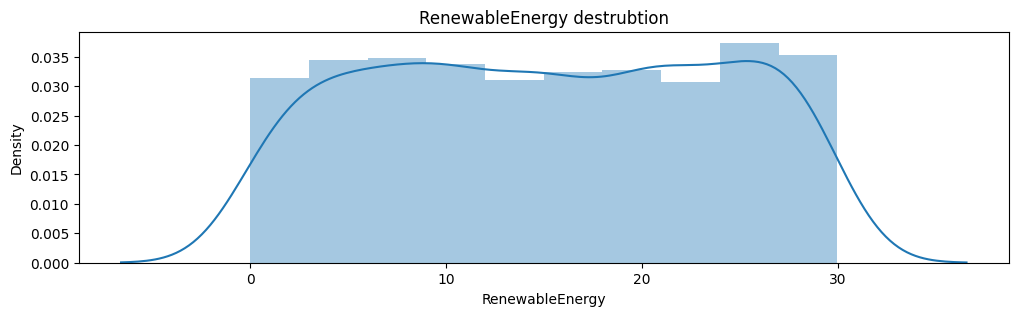

In [ ]:

fig = plt.subplots(figsize=(12, 3))
sns.distplot(data["RenewableEnergy"]).set_title("RenewableEnergy destrubtion")

In [ ]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
#
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year


([<matplotlib.axis.XTick at 0x7c984e41cc40>,
 [Text(1925.0, 0, '1925'), Text(2025.0, 0, '2025'), Text(2125.0, 0, '2125')])

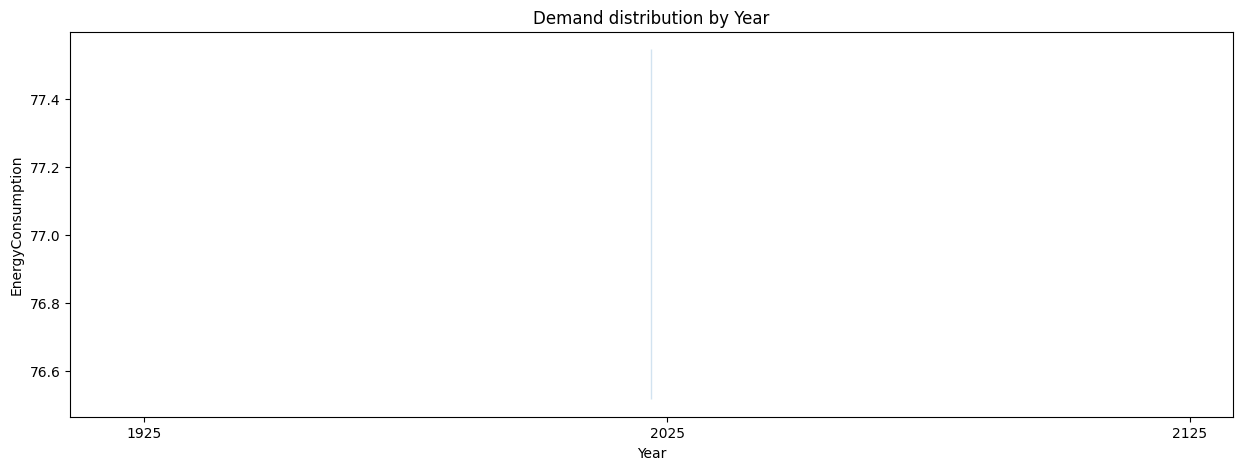

In [ ]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Year, y=df.EnergyConsumption, data=df).set_title('Demand distribution by Year')
locs, _ = plt.xticks()
plt.xticks(locs[1:10:4])